<a href="https://colab.research.google.com/github/iarithik/Quantum-Implementations-of-Classical-Gates/blob/main/Quantum_Implementations_of_Classical_Gates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install qiskit qiskit_aer pylatexenc --q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 74.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 68.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 3.3 MB/s eta 0:00:00


##### AND Gate

We are trying to build some of the classical gates (AND, OR,...) using only the universal quantum gates.

AND: \begin{array}{cc|c} \mathbf{In} & \mathbf{In} & \mathbf{Out} \\ \hline 0 & 0 & 0 \\ 0 & 1 & 0 \\ 1 & 0 & 0 \\1 & 1 & 1      \end{array}

AND gate
Let us start with the AND gate. We can build classical AND gate using our toffoli gate itself.

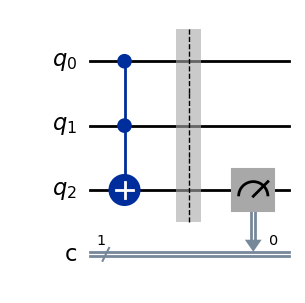

In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

qc_and = QuantumCircuit(3,1)
qc_and.ccx(0,1,2)
qc_and.barrier()
qc_and.measure(2,0) # or use qc_and.measure_all()
qc_and.draw(output='mpl')

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator

for i in ['00','01','10','11']:
    qc_and = QuantumCircuit(3,1)
    if i[0]=='1':
        qc_and.x(0)
    if i[1]=='1':
        qc_and.x(1)
    qc_and.ccx(0,1,2)
    qc_and.barrier()
    qc_and.measure(2,0) # or use qc_and.measure_all()
    print(qc_and.draw(output='text'))
    job = AerSimulator().run(qc_and,shots=1000)
    counts = job.result().get_counts()
    print(f"For {i} as inputs:{counts} counts")
    print("-------------------------------")



           ░    
q_0: ──■───░────
       │   ░    
q_1: ──■───░────
     ┌─┴─┐ ░ ┌─┐
q_2: ┤ X ├─░─┤M├
     └───┘ ░ └╥┘
c: 1/═════════╩═
              0 
For 00 as inputs:{'0': 1000} counts
-------------------------------
                ░    
q_0: ───────■───░────
     ┌───┐  │   ░    
q_1: ┤ X ├──■───░────
     └───┘┌─┴─┐ ░ ┌─┐
q_2: ─────┤ X ├─░─┤M├
          └───┘ ░ └╥┘
c: 1/══════════════╩═
                   0 
For 01 as inputs:{'0': 1000} counts
-------------------------------
     ┌───┐      ░    
q_0: ┤ X ├──■───░────
     └───┘  │   ░    
q_1: ───────■───░────
          ┌─┴─┐ ░ ┌─┐
q_2: ─────┤ X ├─░─┤M├
          └───┘ ░ └╥┘
c: 1/══════════════╩═
                   0 
For 10 as inputs:{'0': 1000} counts
-------------------------------
     ┌───┐      ░    
q_0: ┤ X ├──■───░────
     ├───┤  │   ░    
q_1: ┤ X ├──■───░────
     └───┘┌─┴─┐ ░ ┌─┐
q_2: ─────┤ X ├─░─┤M├
          └───┘ ░ └╥┘
c: 1/══════════════╩═
                   0 
For 11 as inputs:{'1': 1000} counts
-------------

##### OR Gate

Similarly for the OR gate, we can implement it using CNOT and CCNOT gates.

OR: \begin{array}{cc|c} \mathbf{In} & \mathbf{In} & \mathbf{Out} \\ \hline 0 & 0 & 0 \\ 0 & 1 & 1 \\ 1 & 0 & 1 \\1 & 1 & 1      \end{array}

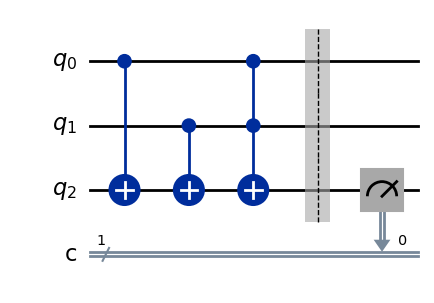

In [ ]:
from qiskit import QuantumCircuit

qc_or = QuantumCircuit(3,1)
qc_or.cx(0,2)
qc_or.cx(1,2)
qc_or.ccx(0,1,2)

qc_or.barrier()
qc_or.measure(2,0)
qc_or.draw(output='mpl')

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator

for i in ['00','01','10','11']:
    qc_or = QuantumCircuit(3,1)
    if i[0]=='1':
        qc_or.x(0)
    if i[1]=='1':
        qc_or.x(1)
    qc_or.cx(0,2)
    qc_or.cx(1,2)
    qc_or.ccx(0,1,2)

    qc_or.barrier()
    qc_or.measure(2,0)
    print(qc_or.draw(output='text'))
    job = AerSimulator().run(qc_or,shots=1000)
    counts = job.result().get_counts()
    print(f"For {i} as inputs:{counts} counts")
    print("-------------------------------")

                     ░    
q_0: ──■─────────■───░────
       │         │   ░    
q_1: ──┼────■────■───░────
     ┌─┴─┐┌─┴─┐┌─┴─┐ ░ ┌─┐
q_2: ┤ X ├┤ X ├┤ X ├─░─┤M├
     └───┘└───┘└───┘ ░ └╥┘
c: 1/═══════════════════╩═
                        0 
For 00 as inputs:{'0': 1000} counts
-------------------------------
                          ░    
q_0: ───────■─────────■───░────
     ┌───┐  │         │   ░    
q_1: ┤ X ├──┼────■────■───░────
     └───┘┌─┴─┐┌─┴─┐┌─┴─┐ ░ ┌─┐
q_2: ─────┤ X ├┤ X ├┤ X ├─░─┤M├
          └───┘└───┘└───┘ ░ └╥┘
c: 1/════════════════════════╩═
                             0 
For 01 as inputs:{'1': 1000} counts
-------------------------------
     ┌───┐                ░    
q_0: ┤ X ├──■─────────■───░────
     └───┘  │         │   ░    
q_1: ───────┼────■────■───░────
          ┌─┴─┐┌─┴─┐┌─┴─┐ ░ ┌─┐
q_2: ─────┤ X ├┤ X ├┤ X ├─░─┤M├
          └───┘└───┘└───┘ ░ └╥┘
c: 1/════════════════════════╩═
                             0 
For 10 as inputs:{'1': 1000} counts
---------

##### NAND and NOR Gate

NAND and NOR gates are easier because we only need to add a X gate of the qubit $(q[2])$ which we will be measuring.

NAND: \begin{array}{cc|c} \mathbf{In} & \mathbf{In} & \mathbf{Out} \\ \hline 0 & 0 & 1 \\ 0 & 1 & 1 \\ 1 & 0 & 1 \\1 & 1 & 0      \end{array}

In [21]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator

for i in ['00','01','10','11']:
    qc_nand = QuantumCircuit(3,1)
    if i[0]=='1':
        qc_nand.x(0)
    if i[1]=='1':
        qc_nand.x(1)
    qc_nand.ccx(0,1,2)
    qc_nand.x(2)
    qc_nand.barrier()
    qc_nand.measure(2,0) # or use qc_nand.measure_all()
    print(qc_nand.draw(output='text'))
    job = AerSimulator().run(qc_nand,shots=1000)
    counts = job.result().get_counts()
    print(f"For {i} as inputs:{counts} counts")
    print("-------------------------------")



                ░    
q_0: ──■────────░────
       │        ░    
q_1: ──■────────░────
     ┌─┴─┐┌───┐ ░ ┌─┐
q_2: ┤ X ├┤ X ├─░─┤M├
     └───┘└───┘ ░ └╥┘
c: 1/══════════════╩═
                   0 
For 00 as inputs:{'1': 1000} counts
-------------------------------
                     ░    
q_0: ───────■────────░────
     ┌───┐  │        ░    
q_1: ┤ X ├──■────────░────
     └───┘┌─┴─┐┌───┐ ░ ┌─┐
q_2: ─────┤ X ├┤ X ├─░─┤M├
          └───┘└───┘ ░ └╥┘
c: 1/═══════════════════╩═
                        0 
For 01 as inputs:{'1': 1000} counts
-------------------------------
     ┌───┐           ░    
q_0: ┤ X ├──■────────░────
     └───┘  │        ░    
q_1: ───────■────────░────
          ┌─┴─┐┌───┐ ░ ┌─┐
q_2: ─────┤ X ├┤ X ├─░─┤M├
          └───┘└───┘ ░ └╥┘
c: 1/═══════════════════╩═
                        0 
For 10 as inputs:{'1': 1000} counts
-------------------------------
     ┌───┐           ░    
q_0: ┤ X ├──■────────░────
     ├───┤  │        ░    
q_1: ┤ X ├──■────────░────
    

NOR: \begin{array}{cc|c} \mathbf{In} & \mathbf{In} & \mathbf{Out} \\ \hline 0 & 0 & 1 \\ 0 & 1 & 0 \\ 1 & 0 & 0 \\1 & 1 & 0      \end{array}

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator

for i in ['00','01','10','11']:
    qc_nor = QuantumCircuit(3,1)
    if i[0]=='1':
        qc_nor.x(0)
    if i[1]=='1':
        qc_nor.x(1)
    qc_nor.cx(0,2)
    qc_nor.cx(1,2)
    qc_nor.ccx(0,1,2)
    qc_nor.x(2)

    qc_nor.barrier()
    qc_nor.measure(2,0)
    print(qc_nor.draw(output='text'))
    job = AerSimulator().run(qc_nor,shots=1000)
    counts = job.result().get_counts()
    print(f"For {i} as inputs:{counts} counts")
    print("-------------------------------")

                          ░    
q_0: ──■─────────■────────░────
       │         │        ░    
q_1: ──┼────■────■────────░────
     ┌─┴─┐┌─┴─┐┌─┴─┐┌───┐ ░ ┌─┐
q_2: ┤ X ├┤ X ├┤ X ├┤ X ├─░─┤M├
     └───┘└───┘└───┘└───┘ ░ └╥┘
c: 1/════════════════════════╩═
                             0 
For 00 as inputs:{'1': 1000} counts
-------------------------------
                               ░    
q_0: ───────■─────────■────────░────
     ┌───┐  │         │        ░    
q_1: ┤ X ├──┼────■────■────────░────
     └───┘┌─┴─┐┌─┴─┐┌─┴─┐┌───┐ ░ ┌─┐
q_2: ─────┤ X ├┤ X ├┤ X ├┤ X ├─░─┤M├
          └───┘└───┘└───┘└───┘ ░ └╥┘
c: 1/═════════════════════════════╩═
                                  0 
For 01 as inputs:{'0': 1000} counts
-------------------------------
     ┌───┐                     ░    
q_0: ┤ X ├──■─────────■────────░────
     └───┘  │         │        ░    
q_1: ───────┼────■────■────────░────
          ┌─┴─┐┌─┴─┐┌─┴─┐┌───┐ ░ ┌─┐
q_2: ─────┤ X ├┤ X ├┤ X ├┤ X ├─░─┤M├
          └───┘└───┘└

##### f